<a href="https://colab.research.google.com/github/Biswajit-Behera/FreecodeCamp_ML_Projects/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-02-01 06:08:12--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2025-02-01 06:08:12 (13.0 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# Generate dummies for sex
dataset = pd.concat([dataset,pd.get_dummies(dataset['sex'],prefix="sex")],axis=1)
dataset.drop('sex', axis=1, inplace=True)

# Generate dummies for smoker
dataset = pd.concat([dataset,pd.get_dummies(dataset['smoker'],prefix="smoker")],axis=1)
dataset.drop('smoker', axis=1, inplace=True)

# Generate dummies for region
dataset = pd.concat([dataset,pd.get_dummies(dataset['region'],prefix="region")],axis=1)
dataset.drop('region', axis=1, inplace=True)
dataset


,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,False,True,True,False,False,True,False,False
1334,18,31.9,0,2205.98,True,False,True,False,True,False,False,False
1335,18,36.9,0,1629.83,True,False,True,False,False,False,True,False
1336,21,25.8,0,2007.95,True,False,True,False,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split  # Import train_test_split

x_columns = dataset.columns.drop('expenses')
x = dataset[x_columns].values
y = dataset['expenses'].values

# Now you can use train_test_split
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)

In [ ]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)

In [ ]:
# Build the neural network
# Build the neural network
from tensorflow.keras.models import Sequential # Import Sequential
from tensorflow.keras.layers import Dense # Import Dense
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
# Convert the datasets to numeric dtype before fitting the model
train_dataset = train_dataset.astype(np.float32)
test_dataset = test_dataset.astype(np.float32)

model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)
model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), callbacks=[monitor], verbose=2, epochs=10000)
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)
model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), callbacks=[monitor], verbose=2, epochs=10000)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10000
34/34 - 6s - 164ms/step - loss: 13224.1904 - mean_absolute_error: 13224.1904 - mean_squared_error: 322320224.0000 - val_loss: 13406.9014 - val_mean_absolute_error: 13406.9014 - val_mean_squared_error: 322563712.0000
Epoch 2/10000
34/34 - 2s - 54ms/step - loss: 13203.5752 - mean_absolute_error: 13203.5752 - mean_squared_error: 321741696.0000 - val_loss: 13380.6055 - val_mean_absolute_error: 13380.6055 - val_mean_squared_error: 321817664.0000
Epoch 3/10000
34/34 - 1s - 35ms/step - loss: 13165.1777 - mean_absolute_error: 13165.1777 - mean_squared_error: 320649024.0000 - val_loss: 13324.8779 - val_mean_absolute_error: 13324.8779 - val_mean_squared_error: 320245024.0000
Epoch 4/10000
34/34 - 2s - 58ms/step - loss: 13083.3926 - mean_absolute_error: 13083.3926 - mean_squared_error: 318361568.0000 - val_loss: 13209.3438 - val_mean_absolute_error: 13209.3438 - val_mean_squared_error: 317004960.0000
Epoch 5/10000
34/34 - 1s - 15ms/step - loss: 12926.9248 - mean_absolute_error: 1292

9/9 - 0s - 9ms/step - loss: 6222.9072 - mean_absolute_error: 6222.9072 - mean_squared_error: 158594320.0000
Testing set Mean Abs Error: 6222.91 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


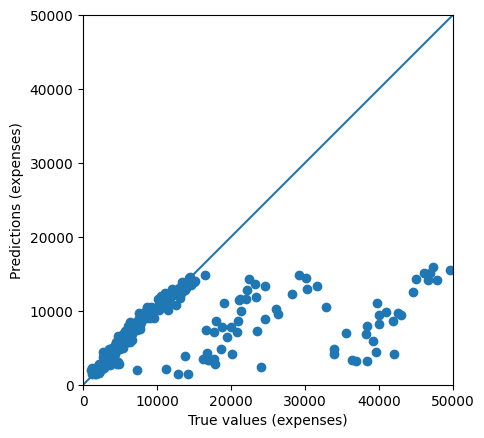

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

In [ ]:
from sklearn.model_selection import train_test_split  # Import train_test_split

x_columns = dataset.columns.drop('expenses')
x = dataset[x_columns].values
y = dataset['expenses'].values

In [ ]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)